In [1]:
#import necessary programs
import mne
import numpy as np
import os
import matplotlib.pyplot as plt

from mne_connectivity import spectral_connectivity_epochs
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

In [2]:
#cross spec
n_jobs = 8 #number of cores to use

In [3]:
#import datasets
path = '/Users/sanwedamahagabin/Desktop/patient_data/mdd_dlpfc/subject5_m155_dlpfc_58/m155_dlpfc_day5/Results/results_run_001/split_fif/'
file_stem = 'm155_dlpfc_reststate1'
file_pre = 'm155_dlpfc_reststate1_pre_cleaned.fif'
file_stem_pre = 'm155_dlpfc_reststate1_pre_cleaned'
data_pre = os.path.join(path, file_pre)
file_post = 'm155_dlpfc_reststate1_post_cleaned.fif'
file_stem_post = 'm155_dlpfc_reststate1_post_cleaned'
data_post = os.path.join(path, file_post)

#raw data load
raw_pre = mne.io.read_raw_fif(data_pre, preload=True, verbose=False)
raw_post = mne.io.read_raw_fif(data_post, preload=True, verbose=False)

/var/folders/88/gj05zhtx4hb9gd7yts5kqdgr0000gn/T/ipykernel_65692/564677331.py:12: RuntimeWarning: This filename (/Users/sanwedamahagabin/Desktop/patient_data/mdd_dlpfc/subject5_m155_dlpfc_58/m155_dlpfc_day5/Results/results_run_001/split_fif/m155_dlpfc_reststate1_pre_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_pre = mne.io.read_raw_fif(data_pre, preload=True, verbose=False)
/var/folders/88/gj05zhtx4hb9gd7yts5kqdgr0000gn/T/ipykernel_65692/564677331.py:13: RuntimeWarning: This filename (/Users/sanwedamahagabin/Desktop/patient_data/mdd_dlpfc/subject5_m155_dlpfc_58/m155_dlpfc_day5/Results/results_run_001/split_fif/m155_dlpfc_reststate1_post_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, 

In [4]:
#turn into epochs
segment_length = 1
epochs_pre = mne.make_fixed_length_epochs(raw_pre, duration=segment_length, preload=True)
epochs_post = mne.make_fixed_length_epochs(raw_post, duration=segment_length, preload=True)

Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 183 events and 250 original time points ...
0 bad epochs dropped
Not setting metadata
181 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 181 events and 250 original time points ...
0 bad epochs dropped


In [5]:
#is this data epoched, who knows
# check if the epochs object contains any epochs
if len(epochs_pre) > 0:
    print(f'The epochs object contains {len(epochs_pre)} epochs.')

    # get information about the epochs
    print(f'Time points per epoch: {epochs_pre.times.min()} to {epochs_pre.times.max()} seconds')
    print(f'Number of channels: {len(epochs_pre.info["ch_names"])}')
else:
    print('The epochs object is empty. It may not have been epoched yet.')

if len(epochs_post) > 0:
    print(f'The epochs object contains {len(epochs_post)} epochs.')

    # get information about the epochs
    print(f'Time points per epoch: {epochs_post.times.min()} to {epochs_post.times.max()} seconds')
    print(f'Number of channels: {len(epochs_post.info["ch_names"])}')
else:
    print('The epochs object is empty. It may not have been epoched yet.')


The epochs object contains 183 epochs.
Time points per epoch: 0.0 to 0.996 seconds
Number of channels: 257
The epochs object contains 181 epochs.
Time points per epoch: 0.0 to 0.996 seconds
Number of channels: 257


In [6]:
csd_fft_pre = csd_fourier(epochs_pre, fmin=4, fmax=8, n_jobs=n_jobs)
csd_mt_pre = csd_multitaper(epochs_pre, fmin=4, fmax=8, adaptive=True, n_jobs=n_jobs)

csd_fft_post = csd_fourier(epochs_post, fmin=4, fmax=8, n_jobs=n_jobs)
csd_mt_post = csd_multitaper(epochs_post, fmin=4, fmax=8, adaptive=True, n_jobs=n_jobs)

Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    2.1s remaining:    3.5s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]
    Using multitaper spectrum estimation with 7 DPSS windows
Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]
Computing cross-spectral density from epochs...


[Parallel(n_jobs=8)]: Done   7 out of   7 | elapsed:    0.1s finished


  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]
    Using multitaper spectrum estimation with 7 DPSS windows
Computing cross-spectral density from epochs...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


In [7]:
frequencies = [4,5,6,7,8]
csd_wav_pre = csd_morlet(epochs_pre, frequencies, decim=10, n_jobs=n_jobs)
csd_wav_post = csd_morlet(epochs_post, frequencies, decim=10, n_jobs=n_jobs)

Computing cross-spectral density from epochs...


/var/folders/88/gj05zhtx4hb9gd7yts5kqdgr0000gn/T/ipykernel_65692/4057514587.py:2: UserWarning: At least one of the wavelets (697) is longer than the signal (250). Consider using a longer signal or shorter wavelets.
  csd_wav_pre = csd_morlet(epochs_pre, frequencies, decim=10, n_jobs=n_jobs)


  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]
Computing cross-spectral density from epochs...


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   7 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   4 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   7 out of   7 | elapsed:    0.1s finished
/var/folders/88/gj05zhtx4hb9gd7yts5kqdgr0000gn/T/ipykernel_65692/4057514587.py:3: UserWarning: At least one of the wavelets (697) is longer than the signal (250). Consider using a longer signal or shorter wavelets.
  csd_wav_post = csd_morlet(epochs_post, frequencies, decim=10, n_jobs=n_jobs)


  0%|          | CSD epoch blocks : 0/23 [00:00<?,       ?it/s]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(

[done]


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


In [8]:
csd_fft_pre_mean = csd_fft_pre.mean().get_data()
csd_fft_post_mean = csd_fft_post.mean().get_data()
diff_fft = csd_fft_post_mean - csd_fft_pre_mean
print(diff_fft)

[[-2.04266553e-15+0.00000000e+00j -9.65676151e-16+4.44804141e-17j
  -7.57043855e-16-4.83540542e-17j ...  4.15510593e-16+1.56173393e-16j
   3.53884388e-16+1.95085820e-16j  6.45355562e-16+9.10512838e-17j]
 [-9.65676151e-16-4.44804141e-17j -2.12288613e-16+0.00000000e+00j
  -8.03176383e-17-4.43215119e-17j ...  2.11127197e-16+1.29127242e-16j
   1.80842257e-16+1.20249100e-16j  3.08057154e-16+1.27603667e-16j]
 [-7.57043855e-16+4.83540542e-17j -8.03176383e-17+4.43215119e-17j
   7.19017548e-17+0.00000000e+00j ...  3.95605124e-17+9.53020789e-17j
   2.79785582e-17+1.10420210e-16j  1.22181249e-16+8.57730335e-17j]
 ...
 [ 4.15510593e-16-1.56173393e-16j  2.11127197e-16-1.29127242e-16j
   3.95605124e-17-9.53020789e-17j ...  5.07491824e-16+0.00000000e+00j
   6.81935894e-16+1.71626587e-16j  4.27141356e-16+2.81471323e-17j]
 [ 3.53884388e-16-1.95085820e-16j  1.80842257e-16-1.20249100e-16j
   2.79785582e-17-1.10420210e-16j ...  6.81935894e-16-1.71626587e-16j
   7.77886628e-16+0.00000000e+00j  7.13050455e-

In [9]:
csd_wav_pre_mean = csd_wav_pre.mean().get_data()
csd_wav_post_mean = csd_wav_post.mean().get_data()
diff_wav = csd_wav_post_mean - csd_wav_pre_mean
print(diff_wav)

[[-6.64595948e-16+0.00000000e+00j -2.36156515e-16+2.15641217e-17j
  -1.60494505e-16-1.37564489e-17j ...  2.70816798e-16+1.65085961e-17j
   2.54426684e-16-5.00944969e-17j  3.17392242e-16+4.20306520e-17j]
 [-2.36156515e-16-2.15641217e-17j  1.33153742e-16+0.00000000e+00j
   1.88709475e-16-2.73071530e-17j ...  1.48237644e-16+4.45767060e-17j
   1.28669565e-16-9.20260370e-18j  1.42607513e-16+6.52308278e-17j]
 [-1.60494505e-16+1.37564489e-17j  1.88709475e-16+2.73071530e-17j
   2.70076234e-16+0.00000000e+00j ...  1.56727649e-17+3.32708552e-17j
   4.40278890e-18+2.03885188e-18j  1.19776587e-17+4.66775615e-17j]
 ...
 [ 2.70816798e-16-1.65085961e-17j  1.48237644e-16-4.45767060e-17j
   1.56727649e-17-3.32708552e-17j ...  5.00169451e-16+0.00000000e+00j
   5.87909707e-16+1.77964091e-17j  4.73117703e-16+1.86668011e-17j]
 [ 2.54426684e-16+5.00944969e-17j  1.28669565e-16+9.20260370e-18j
   4.40278890e-18-2.03885188e-18j ...  5.87909707e-16-1.77964091e-17j
   7.56360622e-16+0.00000000e+00j  6.25299989e-

In [10]:
csd_mt_pre_mean = csd_mt_pre.mean().get_data()
csd_mt_post_mean = csd_mt_post.mean().get_data()
diff_mt = csd_mt_post_mean - csd_mt_pre_mean
print(diff_mt)

[[-3.72348702e-16+0.00000000e+00j  9.56101198e-18+4.34914980e-17j
   3.16310413e-17+2.60108919e-17j ...  3.95208462e-16-4.88397484e-17j
   3.83704661e-16-1.30923538e-16j  3.73310221e-16-1.10197369e-17j]
 [ 9.56101198e-18-4.34914980e-17j  3.57709783e-16+0.00000000e+00j
   3.60071088e-16-1.66435454e-17j ...  2.71627598e-16+8.86085458e-19j
   2.29393670e-16-4.01391100e-17j  1.94795087e-16+1.71498398e-17j]
 [ 3.16310413e-17-2.60108919e-17j  3.60071088e-16+1.66435454e-17j
   4.10156877e-16+0.00000000e+00j ...  9.37057699e-17-8.02973654e-18j
   5.13076152e-17-2.49772462e-17j  3.37381645e-17-8.24959125e-20j]
 ...
 [ 3.95208462e-16+4.88397484e-17j  2.71627598e-16-8.86085458e-19j
   9.37057699e-17+8.02973654e-18j ...  6.73131555e-16+0.00000000e+00j
   7.80702017e-16+3.51251976e-18j  6.37067667e-16+1.57923247e-17j]
 [ 3.83704661e-16+1.30923538e-16j  2.29393670e-16+4.01391100e-17j
   5.13076152e-17+2.49772462e-17j ...  7.80702017e-16-3.51251976e-18j
   1.13271360e-15+0.00000000e+00j  7.86205408e-

In [11]:
#save code
#create a directory to save the data
csd_folder = 'csd'
save_dir = os.path.join(path, csd_folder)
os.makedirs(save_dir, exist_ok=True)

#pre
csd_fft_file_pre = os.path.join(save_dir, f'{file_stem_pre}_csd_fft.npy')
csd_mt_file_pre = os.path.join(save_dir, f'{file_stem_pre}_csd_mt.npy')
csd_wav_file_pre = os.path.join(save_dir, f'{file_stem_pre}_csd_wav.npy')

np.save(csd_fft_file_pre, csd_fft_pre)
np.save(csd_mt_file_pre, csd_mt_pre)
np.save(csd_wav_file_pre, csd_wav_pre)

#post
csd_fft_file_post = os.path.join(save_dir, f'{file_stem_post}_csd_fft.npy')
csd_mt_file_post = os.path.join(save_dir, f'{file_stem_post}_csd_mt.npy')
csd_wav_file_post = os.path.join(save_dir, f'{file_stem_post}_csd_wav.npy')

np.save(csd_fft_file_post, csd_fft_post)
np.save(csd_mt_file_post, csd_mt_post)
np.save(csd_wav_file_post, csd_wav_post)

/Users/sanwedamahagabin/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [12]:
diff_fft = os.path.join(save_dir, f'{file_stem}_diff_fft.npy')
diff_mt = os.path.join(save_dir, f'{file_stem}_diff_mt.npy')
diff_wav = os.path.join(save_dir, f'{file_stem}_diff_wav.npy')

np.save(diff_fft, diff_fft)
np.save(diff_mt, diff_mt)
np.save(diff_wav, diff_wav)

In [13]:
#Short-time Fourier Transform (csd_fft)
#fig, ax = plt.subplots()
#csd_fft_pre.plot()
#plt.title("Short-time Fourier Transform")
#plt.show()

#fig, ax = plt.subplots()
#csd_fft_post.plot()
#plt.title("Short-time Fourier Transform")
#plt.show()



TypeError: Image data of dtype <U166 cannot be converted to float

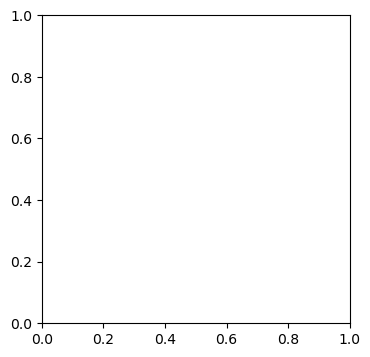

In [14]:
#Adaptive multitapers" (csd_mt)
#fig, ax = plt.subplots()
#csd_mt_pre.plot()
#plt.title("Adaptive multitapers")
#plt.show()

plt.figure(figsize=(4,4))
plt.imshow(np.real(diff_wav))
np.max(np.real(diff_wav))
plt.colorbar()

plt.figure(figsize=(4,4))
plt.imshow(np.real(diff_mt))
np.max(np.real(diff_mt))
plt.colorbar()

#fig, ax = plt.subplots()
#csd_mt_post.mean().plot()
#plt.title("Adaptive multitapers")
#plt.show()

In [ ]:
#"Morlet wavelet transform" (csd_wav)
fig, ax = plt.subplots()
csd_wav_pre.mean().plot()
plt.title("Morlet wavelet transform")
plt.show()

fig, ax = plt.subplots()
csd_wav_post.mean().plot()
plt.title("Morlet wavelet transform")
plt.show()

# PLI